# **Manual Logistic Regression**

In [5]:
Goal="""In this code I will implement logistic regression from scratch using gradient descent to classify data.
this is aiming to understand the algorithm's core principles without relying on ML libraries."""


## Data Preparation

In [6]:
""" data source: Autoencoder Entanglement detection optimizer
https://gitlab.com/quantum-machine-learning/autoencoder-entanglement-detection-optimizer"""

import pickle 
from sklearn.model_selection import train_test_split 
import numpy as np 
df = pickle.load(open( r"C:\Users\Maryam\Desktop\8th term\ML\E3.ML\data_4\data", 'rb')) # 'rb' = "read binary"

X = df.iloc[:, :-1]  #selecting everything except the last one (Features)
y = df.iloc[:, -1]  #last column (target label)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3) #30% of the data is chosen randomly for the test set
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
xtest=np.array(xtest)
ytest=np.array(ytest)

## Logistic Regression Model

In [7]:
#truth: yt={0,1}     #predicted: yi'=yp_i = σ(w^T*xi + b) ; σ= 1/ 1 + exp(-z)
#loss func: L=-1/N ∑ (yi*log(yi') + (1-yi)*log(1-yi'))
# gradient descent: wj-η.dL/dwj -> wj   ,   b-η.dL/db -> b
epsilon=10**(-5)
import matplotlib.pyplot as plt
#z=np.dot(x.T,w) + b
#yp= sigmoid*z    #yp_i = σ(w^T*xi + b) 

#sigmoid function
def sigmoid (z):
    sigma= 1/ (1 + np.exp(-z))
    return sigma


#gradient
def gradient(x,yt,yr):
    N=len(yr)
    dldw=np.ones(16)
    dLdb=0
    #partial derivatives
    for i in range(N):
        dLdb+=((1+np.e**(-yr[i]))**-2 * np.e**(-yr[i]))*(yt[i]/sigmoid(yr[i]+epsilon) - (1-yt[i])/(1-sigmoid(yr[i]+epsilon)))
        dldw+=x[i][:]*((1+np.e**(-yr[i]))**-2 * np.e**(-yr[i]))*(yt[i]/sigmoid(yr[i]+epsilon) - (1-yt[i])/(1-sigmoid(yr[i]+epsilon))) 
    return (-1*dldw/N, -dLdb/N)

def regression(x,yt,epoch):
    n_samples, n_features = x.shape
    w = np.ones(n_features) #initial w
    b=0
    η=1 #learning rate
    for j in range(epoch):
        yr=[]
        for i in range(n_samples):
            yr.append(np.dot(w.T,x[i][:])+b)
        dw=-η*(gradient(x,yt,np.array(yr))[0])
        db=-η*(gradient(x,yt,np.array(yr))[1])
        w+=dw
        b+=db
    return (w,b)

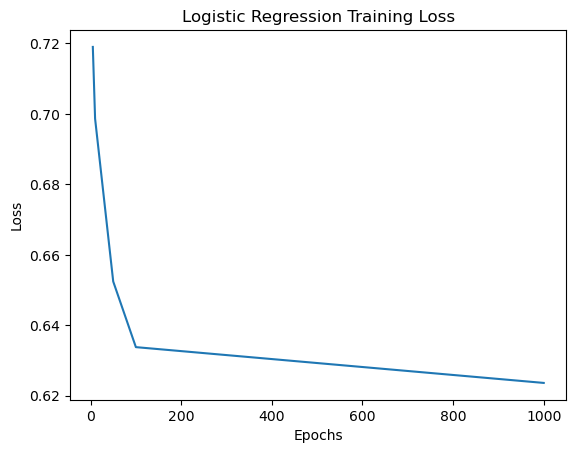

In [8]:
A=regression(xtrain,ytrain,10)

#the loss function - binary cross entropy 
def lossfunc(yt,yp):
    L=0
    N=len(yp)
    L=0
    for i in range(N):
        L+= (yt[i]*np.log(yp[i])+(1-yt[i])*np.log(1-yp[i]))
    return -L/N

#prediction
yp=[]
for i in range(len(ytest)):
    yp.append(sigmoid(np.dot(A[0].T,xtest[i][:])+A[1]))

#Measuring loss func in different epochs number
B=[5,10,50,100,1000]
C=[]
for k in B:
    A=regression(xtrain,ytrain,k)
    yp=[]
    for i in range(len(ytest)):
        yp.append(sigmoid(np.dot(A[0].T,xtest[i][:])+A[1]))
    C.append(lossfunc(ytest,yp))
plt.plot(B,C)
plt.title("Logistic Regression Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()